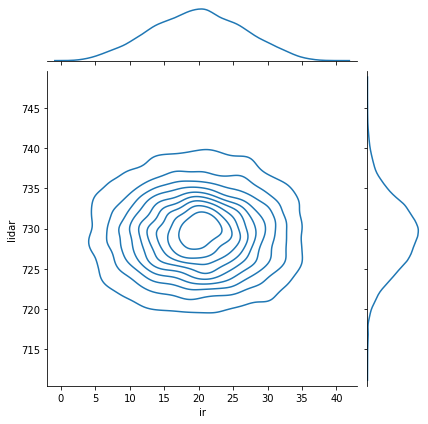

In [1]:
#2次元ガウス分布
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./sample_data/sensor_data_700.txt",delimiter=" ", header=None, names = ["date","time","ir","lidar"])

d = data[ (data["time"]<160000) & (data["time"]>=120000) ]
d = d.loc[:, ["ir","lidar"]]

sns.jointplot(x=d["ir"],y=d["lidar"],data=d,kind="kde")

In [ ]:
#光センサとlidarの測定値の共分散の計算_1
print("光センサの計測値の分散:", d.ir.var())
print("LIDARの計測値の分散:", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()
a = diff_ir*diff_lidar
print("共分散:", sum(a)/len(d))

d.mean()

光センサの計測値の分散: 42.117126367699505
LIDARの計測値の分散: 17.702026469211596
共分散: -0.31675568619766026


ir        19.860247
lidar    729.311958
dtype: float64

In [ ]:
#光センサとlidarの測定値の共分散の計算_2
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


[[1.21734820e-09 3.55358955e-09 9.80353730e-09 ... 9.08189607e-09
  3.27765686e-09 1.11792724e-09]
 [1.94375101e-09 5.67163832e-09 1.56400997e-08 ... 1.42749291e-08
  5.14963403e-09 1.75566587e-09]
 [3.03077342e-09 8.83968552e-09 2.43659447e-08 ... 2.19108091e-08
  7.90089464e-09 2.69250936e-09]
 ...
 [5.44913360e-09 1.56585491e-08 4.25244474e-08 ... 2.27216056e-08
  8.07230553e-09 2.71031183e-09]
 [3.61387504e-09 1.03803655e-08 2.81783301e-08 ... 1.48339329e-08
  5.26781281e-09 1.76793972e-09]
 [2.34048483e-09 6.71986879e-09 1.82338698e-08 ... 9.45715760e-09
  3.35699040e-09 1.12616667e-09]]


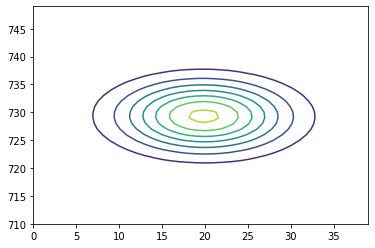

In [27]:
from scipy.stats import multivariate_normal
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values) #平均値と共分散が既知の、多次元の正規分布に従う、乱数を生成し、irlidarに代入している。


x,y = np.mgrid[0:40,710:750]
pos = np.zeros(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y
cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

plt.show()